Funkcja Rungego

In [1]:
function f(x)
    return Float64(Float64(1)/(Float64(25)*(x^Float64(2)) + Float64(1)))
end

f (generic function with 1 method)

Funkcja max ( |f(xk) - w(xk)| ) na przedziale [-1,1] w N równoodległych punktach

In [2]:
N = 1000
x_k = zeros(Float64, N+1)
for i = 0:N
    x_k[i+1] = -1 + (2*i)/N
end


In [3]:
function max(f,w)
    e_k = zeros(Float64, N+1)
    for i = 1:(N+1)
        e_k[i] = abs(f(x_k[i]) - w(x_k[i]))
    end
    return maximum(e_k)
end

max (generic function with 1 method)

Wielomian interpolacyjny Newtona

In [4]:
function newton_coeffs(nodes, f_vals)
    coeffs = Float64[]
    len = length(nodes)
    f_values = copy(f_vals)

    push!(coeffs, f_values[1])
    
    for j = 1:len-1
        for i = 1:len-j
            f_values[i] = ((f_values[i] - f_values[i + 1])
                             / (nodes[i] - nodes[i + j]))
        end
        push!(coeffs, f_values[1])
    end
    coeffs
end

newton_coeffs (generic function with 1 method)

In [5]:
function Newton(x, xnodes, f_values)
    listofa = newton_coeffs(xnodes, f_values)
    sum = 0
    for i = 1:length(listofa)
        product = 1
        for j = 1:i-1
            product *= (x - xnodes[j])
        end
        sum += product * listofa[i]
    end
    return sum
end

Newton (generic function with 1 method)

Przykład użycia Newtona (podajemy wiejsce, w którym chcemy wartość, punkty w których interpolujemy (jako listę) oraz wartości funkcji w tych punktach)

In [6]:
Newton(0, [-2,-1, 0, 1, 2, 3], [31, 5, 1, 1, 11, 61])

1.0

a) Wielomian interpolujący funkcję f w węzłach równoodległych

Wielomian ma być stopnia 9, więc potrzebujemy 10 równoodległych punktów na przedziale [-1,1]

In [7]:
x_k2 = zeros(Float64,10)
for i = 1:10
    x_k2[i] = -1 + (i-1)*Float64((2/9))
end
fx_k2 = zeros(Float64,10)
for i = 1:10
    fx_k2[i] = f(x_k2[i])
end

In [8]:
function wa(x)
    Newton(x,x_k2,fx_k2)
end

wa (generic function with 1 method)

10 zer T10

In [9]:
x_k3 = zeros(Float64,10)
for i = 1:10
    x_k3[i] = Float64(cos((2*i-1) * pi / 20 ))
end
fx_k3 = zeros(Float64,10)
for i = 1:10
    fx_k3[i] = f(x_k3[i])
end

In [10]:
function wb(x)
    Newton(x,x_k3,fx_k3)
end

wb (generic function with 1 method)

10 ekstremów T9

In [11]:
x_k4 = zeros(Float64,10)
for i = 1:10
    x_k4[i] = Float64(cos( (i-1)*pi / 9 ))
end
fx_k4 = zeros(Float64,10)
for i = 1:10
    fx_k4[i] = f(x_k4[i])
end

In [12]:
function wc(x)
    Newton(x,x_k4,fx_k4)
end

wc (generic function with 1 method)

Algorytm Clenshawa dla wielomianów czebyszewa

In [13]:
function clenshaw(n,c,x)
    Bk_1 = 0
    Bk_2 = 0
    for i = n:(-1):1
        Bk = Float64(2) * x * Bk_1 - Bk_2 + c[i+1]
        Bk_2 = Bk_1
        Bk_1 = Bk
    end
    return x * Bk_1 - Bk_2 + c[1]/Float64(2)
end

clenshaw (generic function with 1 method)

In [14]:
using QuadGK

In [15]:
function p(x)
    return Float64((Float64(1) - Float64(x^2)) ^ (0.5))
end

p (generic function with 1 method)

In [16]:
function T(k,x)
    return cos(k * acos(x))
end

T (generic function with 1 method)

Definicja 10-ciu pierwszych wielomianów Legandre`a

In [17]:
function p0(x)
    return 1
end
function p1(x)
    return x
end
P_h = [p0,p1]
for i = 2:10
    push!(P_h, (x-> ((2*i-1)/i)*x*(P_h[i](x)) - ((i-1)/i) * (P_h[i-1](x)) ))
end

In [18]:
function P(n,x)
    P_h[n+1](x)
end

P (generic function with 1 method)

suma d0 \* P0(x) + d1 \* P1(x) + ... + dn \* Pn(x) - można Clenshowem w wersji dla Legandre`a, ale coś nie wyszło

In [19]:
function sum_of_legandre(n,d,x)
    s = Float64(0)
    for i = 0:n
        s += d[i+1] * P(i,x)
    end
    return s
end       

sum_of_legandre (generic function with 1 method)

obliczanie d_k = <f,Pk> (bardzo długo się liczą)

In [20]:
d_k = zeros(Float64,10)
for i = 0:9
    d_k[i+1] = quadgk(x -> f(x) * P(i,x), -1, 1, maxevals = 10)[1]
end

obliczanie d_k2 = <f,Pk> / <Pk,Pk>, <Pk,Pk> = 2/(2k+1)

In [21]:
d_k2 = zeros(Float64,10)
for i = 0:9
    d_k2[i+1] = d_k[i+1] * ((2*i + 1) / 2)
end

Wielomian optymalny w d) to suma d0 \* P0(x) + d1 \* P1(x) + ... + dn \* Pn(x) dla d_k = <f,Pk> / <Pk,Pk>

In [22]:
function wd(x)
    return Float64(sum_of_legandre(9,d_k2,x) )
end

wd (generic function with 1 method)

Podpunkt e to wielomian w(x) = pi/2 * (clenshaw n=9, ck = <f,Tk(x)>, x=x)

In [34]:
c_k = zeros(Float64,10)
for i = 0:9
    c_k[i+1] = quadgk(x -> p(x) * f(x) * T(i,x), -1, 1)[1]
end

In [24]:
function we(x)
    return Float64( (2 / pi) * clenshaw(9,c_k,x))
end

we (generic function with 1 method)

In [25]:
max(f,wa)

0.3002811297925676

In [26]:
max(f,wb)

0.2691783353450813

In [27]:
max(f,wc)

0.3190952547347733

In [28]:
max(f,wd)

0.1329194855653557

In [29]:
max(f,we)

0.170571513367629

In [30]:
using Plots;


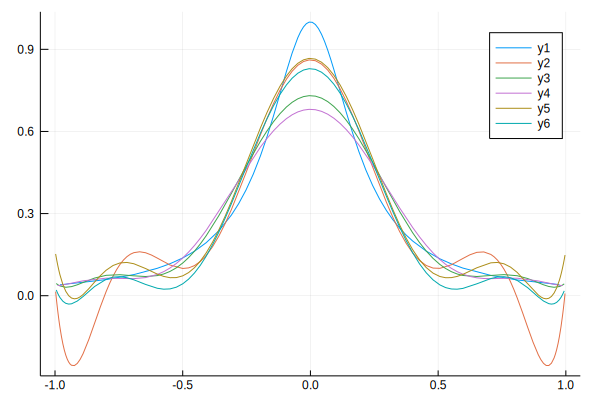

In [38]:
plot([f, wa, wb, wc, wd, we], -1, 1)